In [44]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [45]:
path = "data_Diabetes_binary_5050_norm/"
data = "2" # options are "all", "2", "10" standing for the dim
samples = 63000 # max is len(dat_trn) but this is very slow

In [46]:
if data == "all":
    dat_trn = pd.read_csv(path+'trn_all.csv').values
    dat_tst = pd.read_csv(path+'tst_all.csv').values
elif data == "2":
    dat_trn = pd.read_csv(path+'trn_pca2.csv').values
    dat_tst = pd.read_csv(path+'tst_pca2.csv').values
elif data == "10":
    dat_trn = pd.read_csv(path+'trn_pca10.csv').values
    dat_tst = pd.read_csv(path+'tst_pca10.csv').values

y_tst = pd.read_csv(path+'tst_labs.csv').values[:,0]
y_trn = pd.read_csv(path+'trn_labs.csv').values[:,0]
print(len(y_trn))
# random indecies - all data is too slow for SVM
index = np.random.choice(len(dat_trn), samples, replace=False) # draws numbers without replacement (thats why i dont use randint)
dat_trn = dat_trn[index]
y_trn = y_trn[index]

63000


In [47]:
# svm
kern = "linear"
deg = 3
if kern == 'poly':
    clf = svm.SVC(kernel=kern, degree=deg)
else:
    clf = svm.SVC(kernel=kern)

clf.fit(dat_trn.copy(), y_trn.copy())
pred_y_test = clf.predict(dat_tst.copy())

In [48]:
acc = np.count_nonzero(pred_y_test == y_tst)/len(y_tst)
acc_0 = int(len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)]))/len(np.where(y_tst==0)[0])
acc_1 = int(np.sum(pred_y_test[np.where(y_tst==1)]))/len(np.where(y_tst==1)[0])

if len(path) == 5:
    label = "diabetes"
else:
    label = path[5:-1]

print(f"True negative  {acc_0*100:.5f}% ({label})")
print(f"True positive  {acc_1*100:.5f}% ({label})")
print(f"False positive {100-acc_0*100:.5f}% ({label})")
print(f"False negative {100-acc_1*100:.5f}% ({label})")

print(f"{acc*100:.5f}% overall accuracy")

# print(f"Acc {label}:\n{int(np.sum(pred_y_test[np.where(y_tst==1)]))}/{len(np.where(y_tst==1)[0])} = {acc_1:.5f}")
# print(f"Acc no {label}:\n{int(len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)]))}/{len(np.where(y_tst==0)[0])} = {acc_0:.5f}")
# print(f"Acc overall:\n{np.count_nonzero(pred_y_test == y_tst)}/{len(y_tst)} = {acc:.5f}")

True negative  70.02256% (Diabetes_binary_5050_norm)
True positive  69.91893% (Diabetes_binary_5050_norm)
False positive 29.97744% (Diabetes_binary_5050_norm)
False negative 30.08107% (Diabetes_binary_5050_norm)
69.97143% overall accuracy


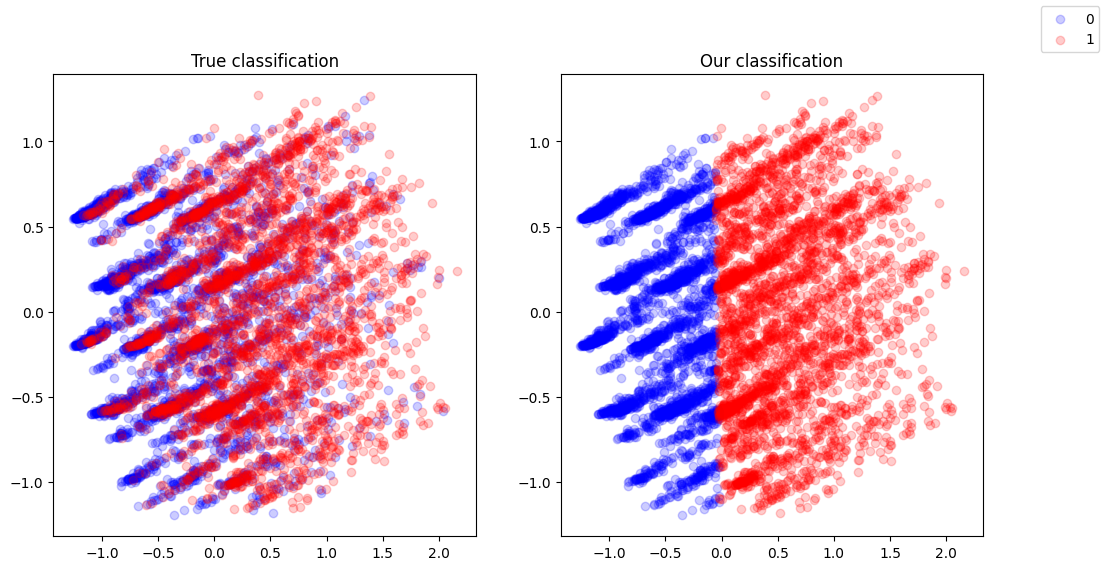

In [49]:
if data == "2":    
    class0 = dat_tst[np.where(pred_y_test==0)]
    class1 = dat_tst[np.where(pred_y_test==1)]

    true0 = dat_tst[np.where(y_tst==0)]
    true1 = dat_tst[np.where(y_tst==1)]

    fig, ax = plt.subplots(1, 2)
    ax[0].scatter(true0[:,0], true0[:,1], label="0", c="b", alpha=0.2)
    ax[0].scatter(true1[:,0], true1[:,1], label="1", c="r", alpha=0.2)
    ax[0].set_title("True classification")

    ax[1].scatter(class0[:,0], class0[:,1], c="b", alpha=0.2)
    ax[1].scatter(class1[:,0], class1[:,1], c="r", alpha=0.2)
    ax[1].set_title("Our classification")

    fig.set_size_inches(12, 6)
    fig.legend()

    save_path = f"{kern}"
    if kern == 'poly':
        save_path += f'_{deg}'

    plt.savefig(f"results/svm_{save_path}.pdf")
    plt.show()

pca2
True negative  87.20344% (diabetes)
True positive  18.13809% (diabetes)
False positive 12.79656% (diabetes)
False negative 81.86191% (diabetes)
77.58199% overall accuracy

pca10
True negative  87.62023% (diabetes)
True positive  23.14658% (diabetes)
False positive 12.37977% (diabetes)
False negative 76.85342% (diabetes)
78.63844% overall accuracy

all
True negative  87.42328% (diabetes)
True positive  6.90436% (diabetes)
False positive 12.57672% (diabetes)
False negative 93.09564% (diabetes)
76.20624% overall accuracy
